# Dependencies

In [24]:
import scipy
from scipy.optimize import curve_fit
from scipy.io import wavfile
from scipy import signal
from scipy.signal import butter, sosfiltfilt
import matplotlib.pyplot as plt
from matplotlib import pylab
import math
import pandas as pd
import numpy as np
import osascript
from gtts import gTTS 
import os 
import pyaudio
import wave
import keyboard  # using module keyboard
import soundfile as sf
import pyloudnorm as pyln
from sys import byteorder
from array import array
from struct import pack
import time
import subprocess
import pyttsx3
import tkinter
import librosa

# Constants

In [25]:
BANDPASS_FREQ = [300, 3400]

# Extract data
for this part we extract the wave file as well as the meta data. the data file has two channels that we are going to clean up before we use. 

In [26]:
fs, data = wavfile.read('../LDC2002S28.wav')
number_of_samples = data.shape[0]
meta_data = open(r"../LDC2002S28-txt.txt")
meta_data = pd.read_csv("../LDC2002S28-txt.txt", sep="A:", header=None, engine='python')
meta_data.columns = ["sound limits","description"]

In [27]:
data = np.average(data, axis = 1)

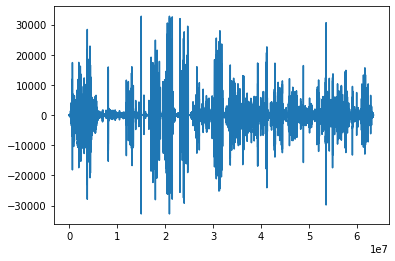

In [28]:
plt.plot(data)

# Filters

In [29]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    sos = butter(order, [low, high], btype='band', analog=False, output='sos')
    return sos

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    sos = butter_bandpass(lowcut, highcut, fs, order=order)
    y = sosfiltfilt(sos, data)
    return y

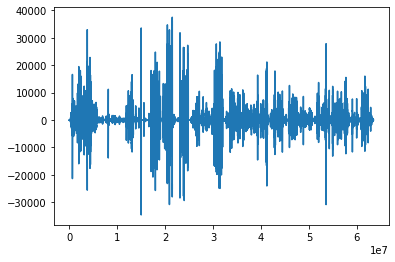

In [30]:
data = butter_bandpass_filter(data, BANDPASS_FREQ[0], BANDPASS_FREQ[1], fs)
plt.plot(data)

# divide the data

In [31]:
voice_time_limits = meta_data["sound limits"]

voice_time_limits = [i.split(" ")[0:2] for i in voice_time_limits]
voice_time_limits = np.array(voice_time_limits)
voice_time_limits = voice_time_limits.astype(np.float)


In [32]:
data_number = 0
divided_data = []
for i in voice_time_limits:
    startingpoint = int(i[0]*fs)
    endingpoint = int(i[1]*fs)
    divided_data.append(data[startingpoint:endingpoint])
    data_number +=1
    

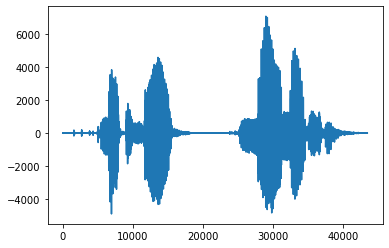

In [38]:
plt.plot(divided_data[1])

In [34]:
np.save("segmented_voice_data",divided_data)

In [35]:
def input(voice_data):
    fs, data = wavfile.read(voice_data)
    number_of_samples = data.shape[0]
    data = np.average(data, axis = 1)
    data = butter_highpass_filter(data, 10, fs)
    plt.plot(data)